In [1]:
import numpy as np

# Arithmetic Operations (allowing for uncertainty)

## Definitions

In [2]:
significant_figures = 4
_float_tolerance = 5 * (10 ** -(significant_figures +1))

def _do_float_division_with_tolerance(divisor, dividend,):
    if _do_float_eq_with_tolerance(divisor, dividend):
        return int(1)
    
    quotient = np.true_divide(divisor, dividend)
    return quotient

def _do_float_subtraction_with_tolerance(minuend, subtrahend,):
    difference = np.subtract(minuend, subtrahend)

    if _do_float_le_with_tolerance(difference + _float_tolerance, int(difference)) and _do_float_ge_with_tolerance(difference - _float_tolerance, int(difference)):
        return int(difference)

    return difference

vectorized_float_division_with_tolerance = np.vectorize(_do_float_division_with_tolerance)
vectorized_float_subtraction_with_tolerance = np.vectorize(_do_float_subtraction_with_tolerance)

def _do_float_eq_with_tolerance(given, to_compare):
    return round(given - _float_tolerance, significant_figures) <= to_compare and round(given + _float_tolerance, significant_figures) >= to_compare

def _do_float_gt_with_tolerance(given, to_compare):
    return round(given - _float_tolerance, significant_figures) > to_compare and round(given + _float_tolerance, significant_figures) > to_compare

def _do_float_lt_with_tolerance(given, to_compare):
    return round(given - _float_tolerance, significant_figures) < to_compare and round(given + _float_tolerance, significant_figures) < to_compare

def _do_float_ge_with_tolerance(given, to_compare):
    return _do_float_gt_with_tolerance(given, to_compare) or _do_float_eq_with_tolerance(given, to_compare)

def _do_float_le_with_tolerance(given, to_compare):
    return _do_float_lt_with_tolerance(given, to_compare) or _do_float_eq_with_tolerance(given, to_compare)

vectorized_float_eq_with_tolerance = np.vectorize(_do_float_eq_with_tolerance)
vectorized_float_gt_with_tolerance = np.vectorize(_do_float_gt_with_tolerance)
vectorized_float_lt_with_tolerance = np.vectorize(_do_float_lt_with_tolerance)
vectorized_float_ge_with_tolerance = np.vectorize(_do_float_ge_with_tolerance)
vectorized_float_le_with_tolerance = np.vectorize(_do_float_le_with_tolerance)

## Unit Tests

In [3]:
import unittest

In [4]:
class FloatEqualityWithToleranceTest(unittest.TestCase):
    def test_float_equality_with_tolerance_returns_false_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.0001 + 0.0001, significant_figures +1)
        
        f1_minus_tolerance = (round(f1, significant_figures) - _float_tolerance)
        f1_plus_tolerance = (round(f1, significant_figures) + _float_tolerance)

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        #print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, False)
    
    def test_float_equality_with_tolerance_returns_false_f2_greater_than_f1(self):
        f1 = round(0.0001 + 0.0001, significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = (round(f1, significant_figures) - _float_tolerance)
        f1_plus_tolerance = (round(f1, significant_figures) + _float_tolerance)

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        #print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, False)

    def test_float_equality_with_tolerance_returns_true_f2_greater_than_f1(self):
        f1 = round(0.000125 + 0.000125, significant_figures + 1)
        f2 = round(2*(10**-significant_figures), significant_figures + 1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures)
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures) 

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, True)

    def test_float_equality_with_tolerance_returns_true_f1_greater_than_f2(self):
        f2 = round(0.000125 + 0.000125, significant_figures + 1)
        f1 = round(2*(10**-significant_figures), significant_figures + 1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures)
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures) 

        condition_1 = f1_minus_tolerance <= f2 
        condition_2 = f1_plus_tolerance >= f2

        floats_are_equal = _do_float_eq_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} <= {f2} = {condition_1}', f'{f1_plus_tolerance=} >= {f2} = {condition_2}', f'result: {floats_are_equal=}')

        self.assertEqual(floats_are_equal, True)

class FloatGreaterThanWithToleranceTest(unittest.TestCase):
    def test_float_greater_than_with_tolerance_returns_false_f1_less_than_f2(self):     
        f1 = round(0.0001 + 0.0001, significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, False)

    def test_float_greater_than_with_tolerance_returns_false_f1_near_f2(self):     
        f1 = round(0.000135 + 0.000135, significant_figures +1)
        f2 = round(3*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, False)

    def test_float_greater_than_with_tolerance_returns_true_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.000135 + 0.000135, significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance > f2 
        condition_2 = f1_plus_tolerance > f2

        f1_is_gt_f2 = _do_float_gt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} > {f2} = {condition_1}', f'{f1_plus_tolerance=} > {f2} = {condition_2}', f'result: {f1_is_gt_f2=}')

        self.assertEqual(f1_is_gt_f2, True)

class FloatLessThanWithToleranceTest(unittest.TestCase):
    def test_float_less_than_with_tolerance_returns_false_f1_greater_than_f2(self):     
        f1 = round(4*(10**-significant_figures), significant_figures +1)
        f2 = round(0.0001 + 0.0001, significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, False)

    def test_float_less_than_with_tolerance_returns_false_f1_near_f2(self):     
        f1 = round(0.000135 + 0.000135, significant_figures +1)
        f2 = round(3*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, False)

    def test_float_less_than_with_tolerance_returns_true_f1_less_than_f2(self):     
        f1 = round(1.35 * (10**-significant_figures) + 1.35 * (10**-significant_figures), significant_figures +1)
        f2 = round(4*(10**-significant_figures), significant_figures +1)
        
        f1_minus_tolerance = round(f1 - _float_tolerance, significant_figures) 
        f1_plus_tolerance = round(f1 + _float_tolerance, significant_figures)

        condition_1 = f1_minus_tolerance < f2 
        condition_2 = f1_plus_tolerance < f2

        f1_is_lt_f2 = _do_float_lt_with_tolerance(f1, f2)

        # print(f'{f1=}, {f2=}', f' {f1_minus_tolerance=} < {f2} = {condition_1}', f'{f1_plus_tolerance=} < {f2} = {condition_2}', f'result: {f1_is_lt_f2=}')

        self.assertEqual(f1_is_lt_f2, True)

class ArithmeticOperationsTest(unittest.TestCase):
    
    def test_float_division_with_tolerance_returns_unity(self):
        f1 = 0.0001 + 0.0001
        f2 = 2*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, int(1))
    
    def test_float_division_with_tolerance_returns_negative_unity(self):
        f1 = 0.0001 + 0.0001
        f2 = -2*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, int(-1))
    
    def test_float_division_with_tolerance_returns_float(self):
        f1 = 0.0001 + 0.0001
        f2 = 4*0.0001
        quotient = _do_float_division_with_tolerance(f1, f2)
        self.assertEqual(quotient, f1/f2)

unittest.main(argv=[''], verbosity=2, exit=False)

test_float_division_with_tolerance_returns_float (__main__.ArithmeticOperationsTest) ... ok
test_float_division_with_tolerance_returns_negative_unity (__main__.ArithmeticOperationsTest) ... ok
test_float_division_with_tolerance_returns_unity (__main__.ArithmeticOperationsTest) ... ok
test_float_equality_with_tolerance_returns_false_f1_greater_than_f2 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_false_f2_greater_than_f1 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_true_f1_greater_than_f2 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_equality_with_tolerance_returns_true_f2_greater_than_f1 (__main__.FloatEqualityWithToleranceTest) ... ok
test_float_greater_than_with_tolerance_returns_false_f1_less_than_f2 (__main__.FloatGreaterThanWithToleranceTest) ... ok
test_float_greater_than_with_tolerance_returns_false_f1_near_f2 (__main__.FloatGreaterThanWithToleranceTest) ... ok
test_float_g

# Schwarzschild Helper Functions and Constants

## Constants

In [5]:
M = 1

## Functions

### Curvature

In [6]:
def get_curvature_factor(r_coordinate):

    if r_coordinate == 0:
        return np.inf

    schwarzschild_radius = 2*M
    r_coordinate_scaled_by_M = np.multiply(r_coordinate, M)

    quotient = vectorized_float_division_with_tolerance(divisor=schwarzschild_radius, dividend=r_coordinate_scaled_by_M)
    difference = vectorized_float_subtraction_with_tolerance(minuend=np.ones(np.shape(r_coordinate)), subtrahend=quotient)

    if difference > 0:
        return np.sqrt(difference)
    else:
        return -np.sqrt(np.abs(difference))

#### Unit Test

In [7]:
import unittest

In [8]:
#unittest.main(argv=[''], verbosity=2, exit=False)

### Energy

In [9]:
def get_energy_per_unit_mass_at_shell(r_coordinate):
    return np.sqrt(_do_float_subtraction_with_tolerance(1, _do_float_division_with_tolerance(2*M, r_coordinate)))

# The Lattice

In [10]:
from dataclasses import dataclass

### Dimensions dataclass

In [11]:
@dataclass(frozen=True)
class Dimensions:
    left: int
    right: int
    top: int
    bottom: int
    resolution: float

### Coordinate and Coordinate System helper dataclasses

#### Cartesian

In [12]:
@dataclass(frozen=True)
class Cartesian:
    x: int
    y: int

    def __eq__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_eq_with_tolerance(self.x, other.x)
            y_match = vectorized_float_eq_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_ge_with_tolerance(self.x, other.x)
            y_match = vectorized_float_ge_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_le_with_tolerance(self.x, other.x)
            y_match = vectorized_float_le_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    ## TODO: need to consider case where x == x, y > y
    def __gt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_gt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_gt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            x_match = vectorized_float_lt_with_tolerance(self.x, other.x)
            y_match = vectorized_float_lt_with_tolerance(self.y, other.y)
            return x_match and y_match
        else:
            return NotImplemented

#### Polar

In [13]:
@dataclass(frozen=True)
class Polar:
    r: int
    phi: float

    def __eq__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_eq_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_eq_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_ge_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_ge_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
            r_match = vectorized_float_le_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_le_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_gt_with_tolerance(self.phi, other.phi)

            r_match = vectorized_float_gt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_gt_with_tolerance(self.phi, other.phi)

            return r_match and phi_match
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            if vectorized_float_eq_with_tolerance(self.r, other.r):
                return vectorized_float_lt_with_tolerance(self.phi, other.phi) 

            r_match = vectorized_float_lt_with_tolerance(self.r, other.r)
            phi_match = vectorized_float_lt_with_tolerance(self.phi, other.phi)
            return r_match and phi_match
        else:
            return NotImplemented

#### Coordinates

In [14]:
class Coordinate:
    def __init__(self, q1: int, q2: int, is_cartesian=True,):
        if is_cartesian:
            self.cartesian = Cartesian(q1, q2)
            self.polar = Coordinate.convert_from_cartesian(self.cartesian)
        else:
            self.polar = Polar(q1, q2)
            self.cartesian = Coordinate.convert_from_polar(self.polar)
        self.curvature = get_curvature_factor(self.polar.r)
    
    def convert_from_polar(coordinates_to_convert: Polar):
        x_coordinate = np.multiply(coordinates_to_convert.r, np.cos(coordinates_to_convert.phi))
        y_coordinate = np.multiply(coordinates_to_convert.r, np.sin(coordinates_to_convert.phi))

        return Cartesian(x=x_coordinate, y=y_coordinate)

    def convert_from_cartesian(coordinates_to_convert: Cartesian):
        r_coordinate = np.sqrt(np.power(coordinates_to_convert.x , 2) + np.power(coordinates_to_convert.y , 2))

        if r_coordinate == 0:
            return Polar(r=r_coordinate, phi=0)
        
        phi_coordinate = np.arctan2(coordinates_to_convert.y, coordinates_to_convert.x)

        if _do_float_lt_with_tolerance(phi_coordinate, 0):
            phi_coordinate = _do_float_subtraction_with_tolerance(phi_coordinate, -2*np.pi)

        return Polar(r=r_coordinate, phi=phi_coordinate)
    
    def __eq__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian == other.cartesian and self.polar == other.polar
        else:
            return NotImplemented

    def __gt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian > other.cartesian and self.polar > other.polar
        else:
            return NotImplemented

    def __ge__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian >= other.cartesian and self.polar >= other.polar
        else:
            return NotImplemented

    def __lt__(self, other):
        if isinstance(other, type(self)):
            return self.cartesian < other.cartesian and self.polar < other.polar
        else:
            return NotImplemented

    def __le__(self, other):
        if isinstance(other, type(self)):
           return self.cartesian <= other.cartesian and self.polar <= other.polar
        else:
            return NotImplemented

### The Latticework Class

#### Creation

In [15]:
class Latticework:

    def __init__(self, dimensions: Dimensions):
        self.dimensions = dimensions
        self._build_grid()
        self._build_dictionary_of_shells()
    
    def _build_grid(self):
        self.vertices = { }
        for x in np.arange(start=self.dimensions.left, stop=self.dimensions.right + 1, step= self.dimensions.resolution):
            for y in np.arange(start=self.dimensions.bottom, stop=self.dimensions.top + 1, step= self.dimensions.resolution):
                self.vertices.update({(x, y) : Coordinate(q1=x, q2=y)})
    
    def get_coordinates_of_constant_r(self, constant_r, ascending=True, complete_loop=True) -> list():
        shell_of_constant_r = self.shells["r"][constant_r].copy()
        if not ascending:
            shell_of_constant_r.sort(reverse= not ascending, key=lambda x: x.polar.phi)
        if complete_loop:
            shell_of_constant_r.append(shell_of_constant_r[0])
        return shell_of_constant_r
    
    def get_coordinates_of_constant_phi(self, constant_phi, ascending=True) -> list():
        shell_of_constant_phi = self.shells["phi"][constant_phi].copy()
        if not ascending:
            shell_of_constant_phi.sort(reverse= not ascending, key=lambda x: x.polar.r)
        return shell_of_constant_phi

    def _build_dictionary_of_shells(self):
        self.shells = { 
            "r" : { }, 
            "phi" : { }, 
            }

        for vertex, coordinate in self.vertices.items():
            if coordinate.polar.r not in self.shells["r"].keys():
                self.shells["r"].update({coordinate.polar.r : [ coordinate, ]})
            else:
                self.shells["r"][coordinate.polar.r].append(coordinate)
            
            phi_exists = False
            for phi in self.shells["phi"].keys():
                if _do_float_eq_with_tolerance(coordinate.polar.phi, phi):
                    phi_exists = True
                    self.shells["phi"][coordinate.polar.phi].append(coordinate)
                    break
            if phi_exists == False:
                self.shells["phi"].update({coordinate.polar.phi : [ coordinate, ]})

        for r in self.shells["r"].keys():
            self.shells["r"][r].sort(key=lambda x: x.polar.phi)
        
        for phi in self.shells["phi"].keys():
            self.shells["phi"][phi].sort(key=lambda x: x.polar.r)
    
    def get_coordinate_at_edge(self):
        return self.shells["r"][self.dimensions.right][0]

#### Visualization of the Lattice

In [16]:
import matplotlib.pyplot as plt

def draw_layout(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot()
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
        rings.append((np.asarray(xs), np.asarray(ys)))

    for ring in rings:
        ax.plot(ring[0], ring[1], c='C1')

    for vertices, coordinate in lattice.vertices.items():
        ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, c='C0')

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    return fig, ax

def draw_layout_3D(lattice, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
            if (coordinate.polar.r <= 2.0):
                zs.append(0)
            else:
                zs.append(np.true_divide(1, coordinate.curvature))
            # if (coordinate.polar.r > 2):
            #     zs.append(np.true_divide(1, coordinate.curvature))
            # else:
            #     zs.append(0)
        rings.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    for ring in rings:
        if (ring[2].any() == 0):
            ax.plot(ring[0], ring[1], 4, c='C3')
        else:
            ax.plot(ring[0], ring[1], ring[2], c='C1')

    curves = [ ]
    for phi in lattice.shells["phi"].keys():
        coordinates_with_phi = lattice.get_coordinates_of_constant_phi(phi)
        
        xs = [ ]
        ys = [ ]
        zs = [ ]
        for coordinate in coordinates_with_phi:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
            if (coordinate.polar.r > 2.0):
                zs.append(np.true_divide(1, coordinate.curvature))
            else:
                zs.append(4)
        curves.append((np.asarray(xs), np.asarray(ys), np.asarray(zs)))

    for curve in curves:
        ax.plot(curve[0], curve[1], curve[2], c='C2')

    for vertices, coordinate in lattice.vertices.items():
        if coordinate.polar.r <= 2.0:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, 4, c='C3')
        else:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, np.true_divide(1, coordinate.curvature), c='C0')
            

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=1, top=4.1,)

    return fig, ax

In [17]:
lattice_dimensions = Dimensions(left=-5, right=5, top=5, bottom=-5, resolution=1)
empty_lattice = Latticework(dimensions=lattice_dimensions)

maximum_curvature = 0
smallest_r_outside_horizon = 3
coord_of_r = None
for r in empty_lattice.shells["r"].keys():
    if r < smallest_r_outside_horizon and r > 2.0:
        smallest_r_outside_horizon = r
        coord_of_r = empty_lattice.shells["r"][smallest_r_outside_horizon][0]
print(np.true_divide(1, empty_lattice.vertices[(coord_of_r.cartesian.x, coord_of_r.cartesian.y)].curvature))

3.077683537175253


##### 2D View

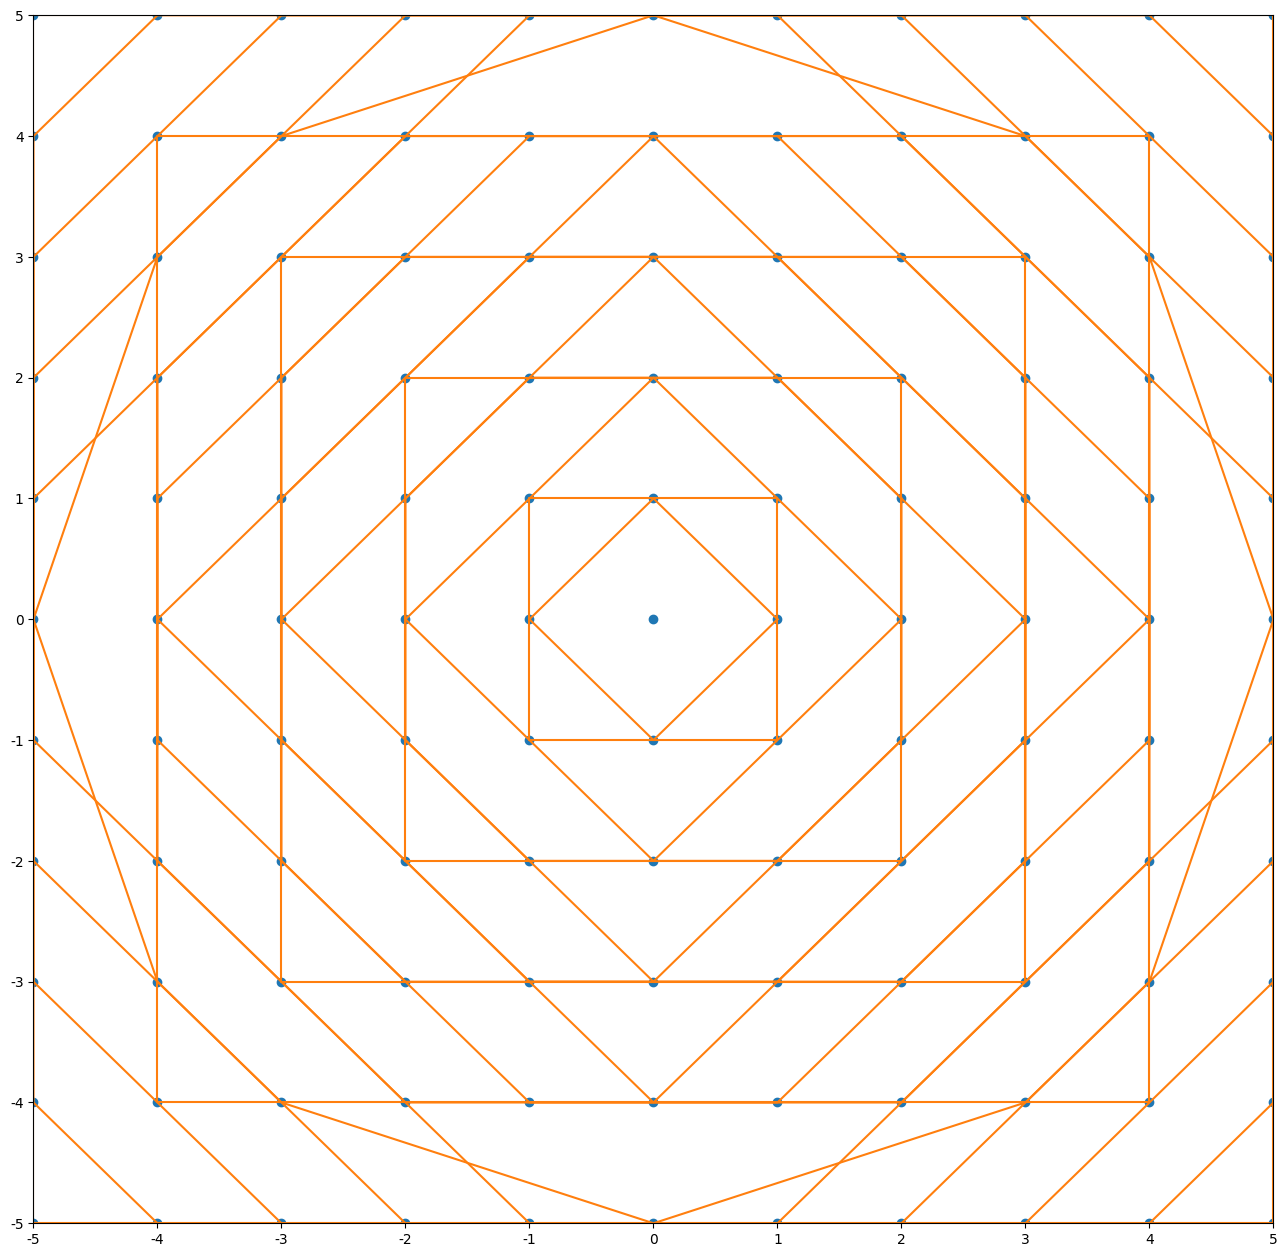

In [18]:
#Flat
fig, ax = draw_layout(empty_lattice)
plt.savefig(f'empty_lattice.jpg',bbox_inches='tight')

##### 3D View

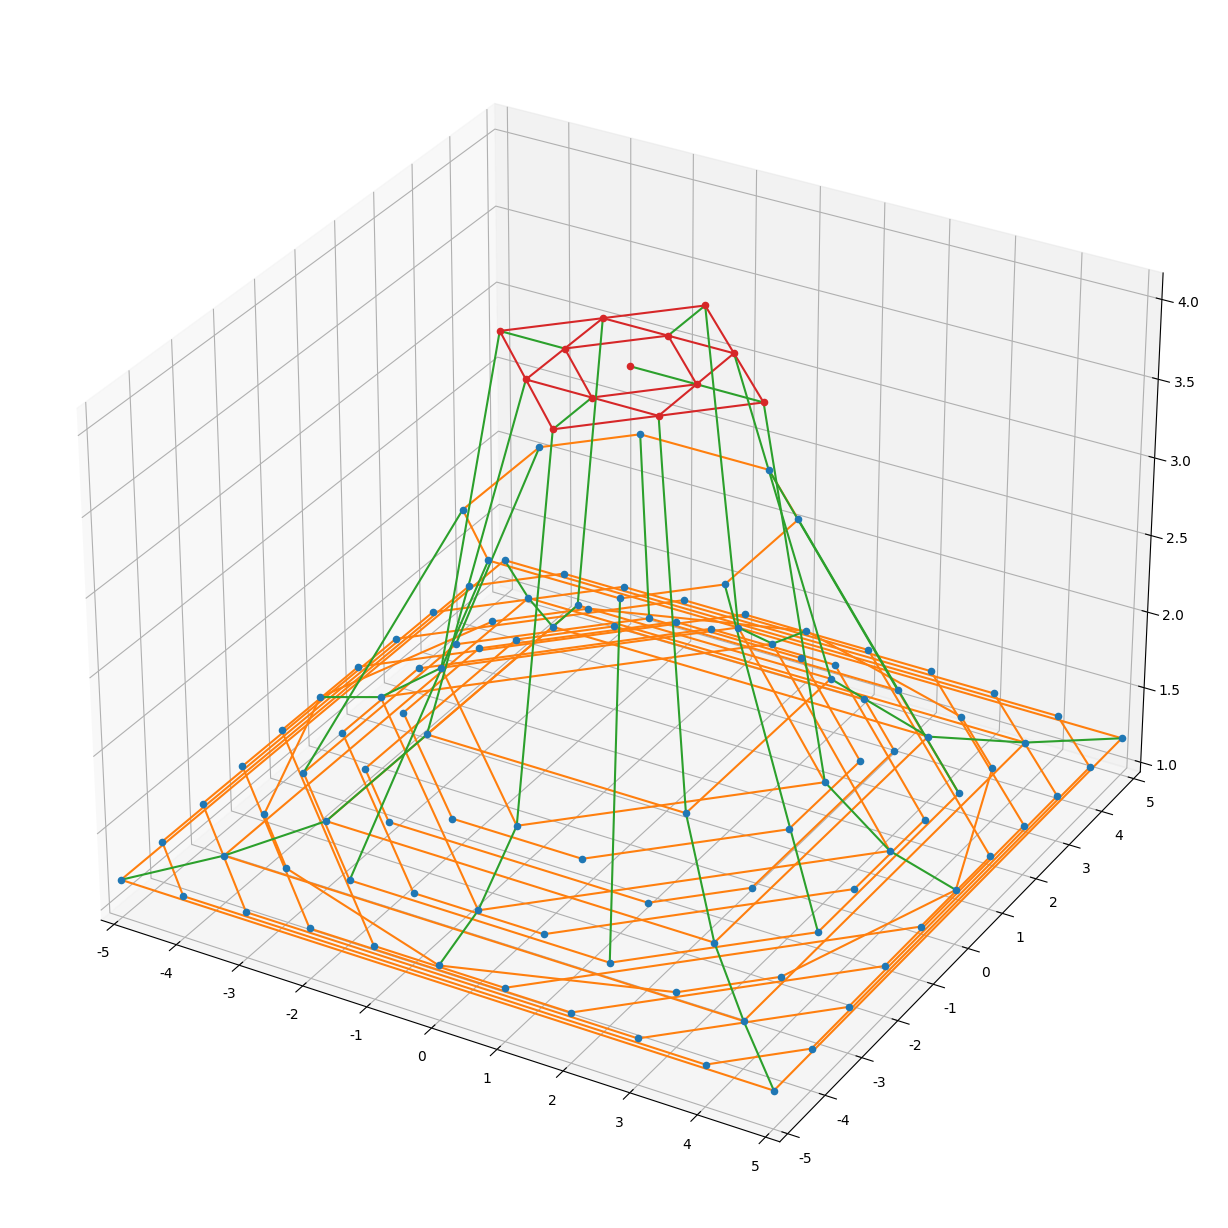

In [19]:
#3D
fig, ax = draw_layout_3D(empty_lattice)

plt.savefig(f'empty_lattice_with_curvature.jpg',bbox_inches='tight')

##### Rotating 3D View

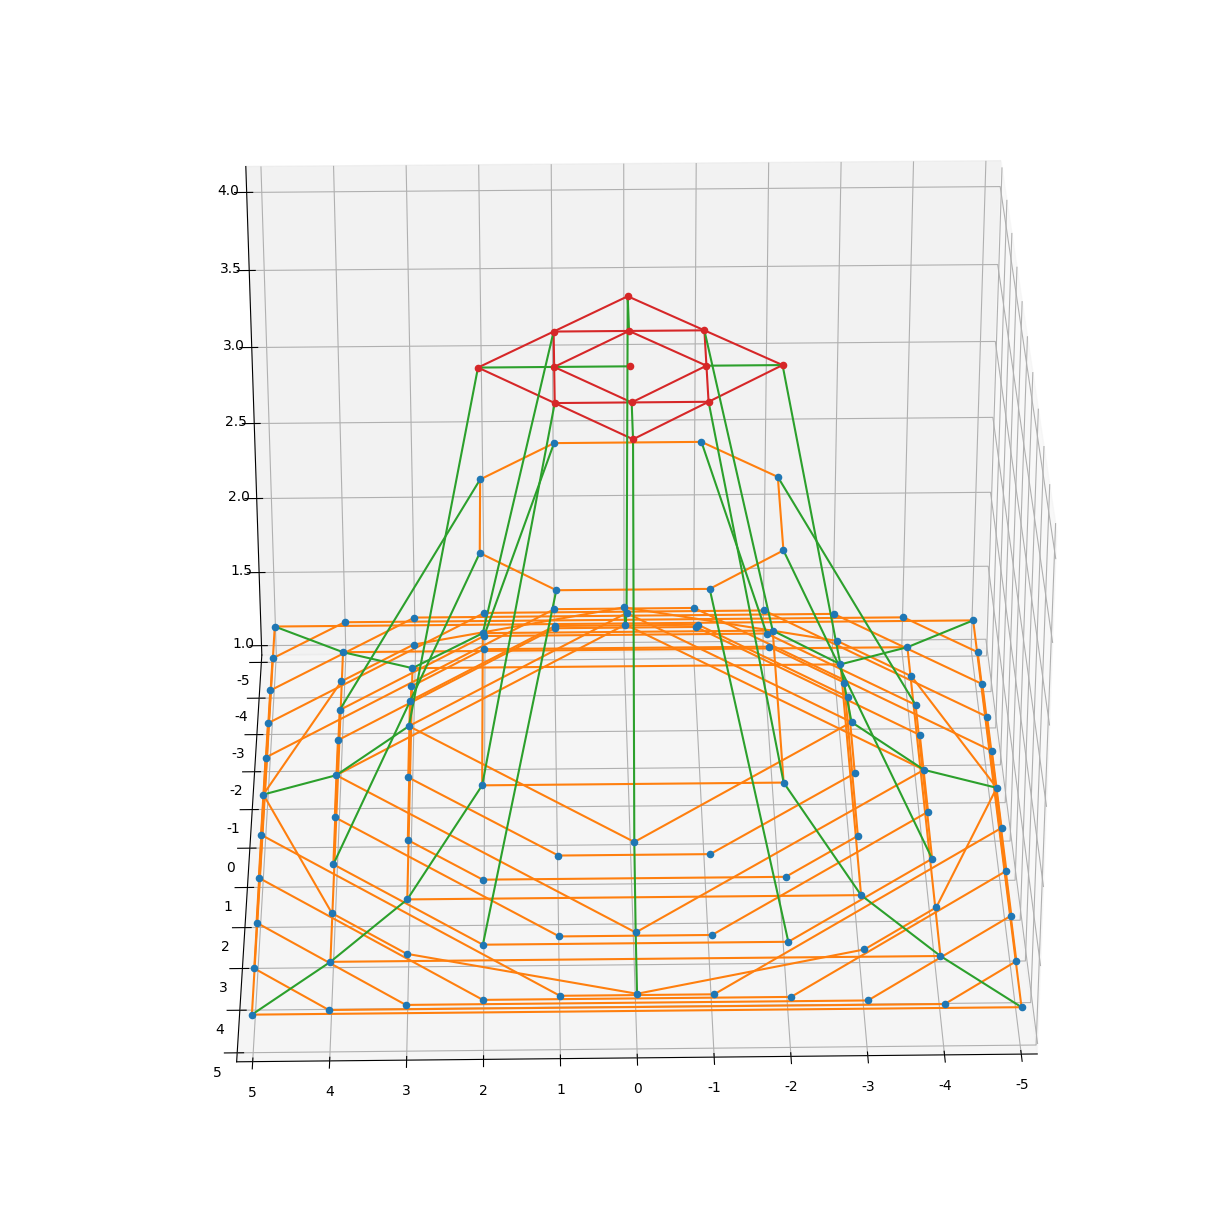

In [41]:
import matplotlib.animation as animation

do_animation = True

if do_animation:
    fig, ax = draw_layout_3D(empty_lattice)

    def get_next_angle(frame):
        current_angle = frame
        ax.view_init(30, current_angle)

    next_angle = get_next_angle

    anim = animation.FuncAnimation(fig, next_angle, frames=90)

    writer = animation.PillowWriter(fps=30)
    from pathlib import Path
    file = Path().absolute()

    anim.save(f'{file}\\rotating_embedded_lattice_with_phi.gif', writer=writer)

# The Stone

In [21]:
class Stone:
    def __init__(self, starting_coordinate, *, at_rest, energy_per_unit_mass=0, angular_momentum_per_unit_mass=0,):
        self.position = [starting_coordinate, ]
        if at_rest:
            self.energy_per_unit_mass = get_energy_per_unit_mass_at_shell(self.position[0].polar.r)
            self.angular_momentum_per_unit_mass = angular_momentum_per_unit_mass
        else:
            self.energy_per_unit_mass = energy_per_unit_mass
            self.angular_momentum_per_unit_mass = angular_momentum_per_unit_mass
    
    def get_path_taken(self):
        t_elapsed = [t for t in np.arange(0, len(self.position))]
        path = self.position.copy()
        path.reverse()
        return path, t_elapsed

# Geodesics

## The Raindrop Path

In [31]:
lattice_dimensions = Dimensions(left=-5, right=5, top=5, bottom=-5, resolution=1)
lattice = Latticework(dimensions=lattice_dimensions)

right_most_shell = lattice.get_coordinate_at_edge()

In [34]:
import math

def path_finder(stone: Stone, time_resolution: float):
    initial_r = stone.position[0].polar.r
    initial_phi = stone.position[0].polar.phi
    coordinate_after_step = Coordinate(q1= initial_r, q2= initial_phi, is_cartesian=False)

    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, 2*M) and len(stone.position) < 30:
        dr_BK_dot = 0
        dr_BK = - math.pow(get_curvature_factor(r_coordinate=stone.position[0].polar.r), 2) * math.sqrt(2*M / stone.position[0].polar.r) * time_resolution
        dphi_BK = (stone.angular_momentum_per_unit_mass / math.pow(stone.position[0].polar.r, 2)) * time_resolution
        coordinate_after_step = Coordinate(q1= stone.position[0].polar.r + dr_BK, q2= stone.position[0].polar.phi + dphi_BK)
        stone.position.insert(0, coordinate_after_step)

def specific_path_finder(stone: Stone, time_resolution: float):
    initial_r = stone.position[0].polar.r
    initial_phi = stone.position[0].polar.phi
    coordinate_after_step = Coordinate(q1= initial_r, q2= initial_phi, is_cartesian=False)
    
    while _do_float_gt_with_tolerance(coordinate_after_step.polar.r, (2*M)) and len(stone.position) < 30:
        current_r = stone.position[0].polar.r
        difference = math.pow(stone.energy_per_unit_mass, 2) - (1 - _do_float_division_with_tolerance((2*M), current_r))*(1 + math.pow(_do_float_division_with_tolerance(stone.angular_momentum_per_unit_mass,  current_r), 2))
        sign = _do_float_division_with_tolerance(math.fabs(difference), difference)
        equation_of_motion = -1*math.sqrt(math.fabs(difference))*time_resolution
        dphi_BK = (stone.angular_momentum_per_unit_mass / math.pow(current_r, 2)) * time_resolution
        coordinate_after_step = Coordinate(
            q1=current_r + equation_of_motion,
            q2=stone.position[0].polar.phi + dphi_BK
        )
        stone.position.insert(0, coordinate_after_step)
        if coordinate_after_step.polar.r <= 2*M:
            print(coordinate_after_step.polar.r)
            return

In [24]:
import matplotlib.pyplot as plt

def draw_path(lattice, stone, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot()
    
    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r)

        xs = [ ]
        ys = [ ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)
        rings.append((np.asarray(xs), np.asarray(ys)))

    for ring in rings:
        ax.plot(ring[0], ring[1], c='C1')

    for vertices, coordinate in lattice.vertices.items():
        ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, c='C0')

    xs = [ ]
    ys = [ ]
    for stone_position in stone.position:
        xs.append(stone_position.cartesian.x)
        ys.append(stone_position.cartesian.y)
    
    ax.plot(np.asarray(xs), np.asarray(ys), c='C4') 

    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    return fig, ax

def draw_path_3D(lattice, stone, figure_size = (16,16)):

    fig = plt.figure(figsize=figure_size, dpi=100,)
    ax = fig.add_subplot(projection='3d')
    
    path_coordinates, elapsed_time = stone.get_path_taken()

    xs = [ ]
    ys = [ ]
    for step in path_coordinates:
        xs.append(step.cartesian.x)
        ys.append(step.cartesian.y)
    
    ax.plot(np.asarray(xs), np.asarray(ys), np.asarray(elapsed_time), c='C4', linewidth=3.0) 


    rings = [ ]
    for r in lattice.shells["r"].keys():
        coordinates_with_r = lattice.get_coordinates_of_constant_r(r, ascending=False)

        closest_time = elapsed_time[-1]
        for step in path_coordinates:
            if _do_float_gt_with_tolerance(coordinates_with_r[0].polar.r, step.polar.r):
                closest_time = elapsed_time[path_coordinates.index(step)]
                break

        xs = [ ]
        ys = [ ]
        zs = [closest_time for t in np.arange(0, len(coordinates_with_r)) ]

        for coordinate in coordinates_with_r:
            xs.append(coordinate.cartesian.x)
            ys.append(coordinate.cartesian.y)

        is_le_2M = _do_float_le_with_tolerance(coordinates_with_r[0].polar.r, 2*M)
        rings.append((np.asarray(xs), np.asarray(ys), np.asarray(zs), is_le_2M))

    for ring in rings:
        if ring[3]:
            ax.plot(ring[0], ring[1], ring[2], color=(1.0, 0, 0, 0.5), linewidth=1.5)
        else:
            ax.plot(ring[0], ring[1], ring[2], color=(0.25, 0.25, 0.25, 0.5), linewidth=1.0)

    for vertices, coordinate in lattice.vertices.items():
        if coordinate.polar.r <= 2.0:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, 0, s=5, color=(1.0, 0, 0, 0.5))
        else:
            ax.scatter(coordinate.cartesian.x, coordinate.cartesian.y, 0, s=5, color=(0, 0, 0, 0.5))
    


    ax.set_xlim( (lattice.dimensions.left, lattice.dimensions.right) )
    ax.set_xticks([x for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])
    ax.set_xticklabels( [f'{int(x)}' for x in range(lattice.dimensions.left, lattice.dimensions.right + 1)])

    ax.set_ylim( (lattice.dimensions.bottom, lattice.dimensions.top) )
    ax.set_yticks([y for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])
    ax.set_yticklabels( [f'{int(y)}' for y in range(lattice.dimensions.bottom, lattice.dimensions.top + 1)])

    ax.set_zlim( bottom=elapsed_time[0], top=elapsed_time[-1]+time_resolution,)

    return fig, ax

### Without Angular Momentum

1.736545056958985


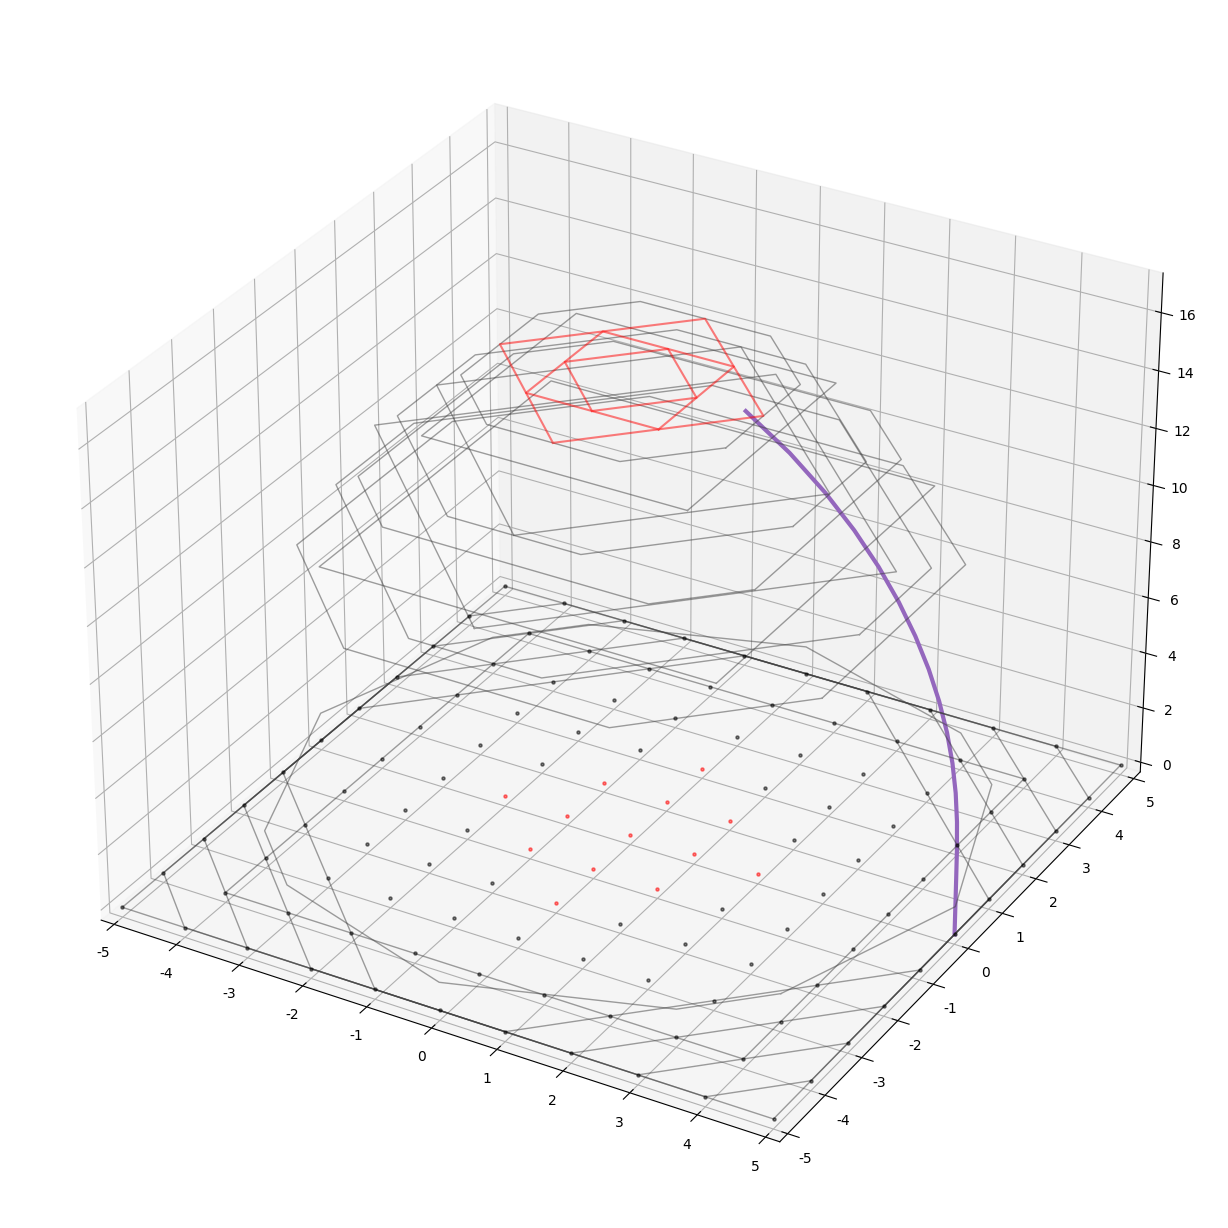

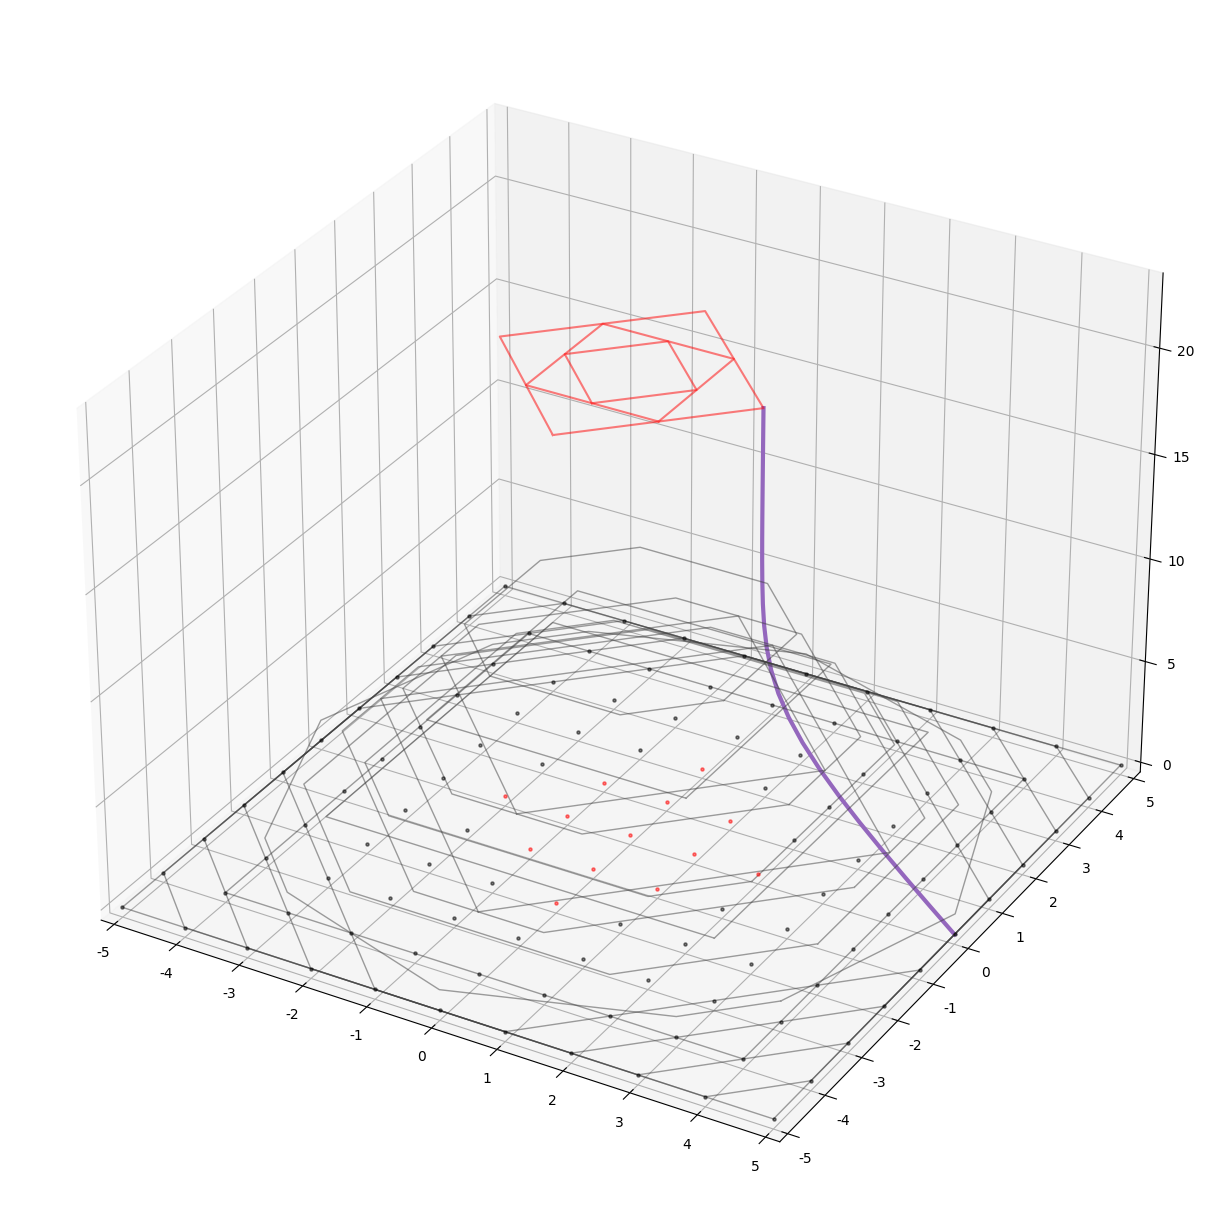

In [35]:
# fig, ax = draw_path(lattice, stone)
time_resolution = 1
stone = Stone(right_most_shell, at_rest=True, angular_momentum_per_unit_mass=0)
specific_path_finder(stone, time_resolution=time_resolution)

fig, ax = draw_path_3D(lattice, stone)

stone = Stone(
    starting_coordinate=right_most_shell,
    at_rest=True,
    angular_momentum_per_unit_mass=0
)
path_finder(stone, time_resolution=time_resolution)
fig, ax = draw_path_3D(lattice, stone)


### With Angular Momentum

1.5197505711142847


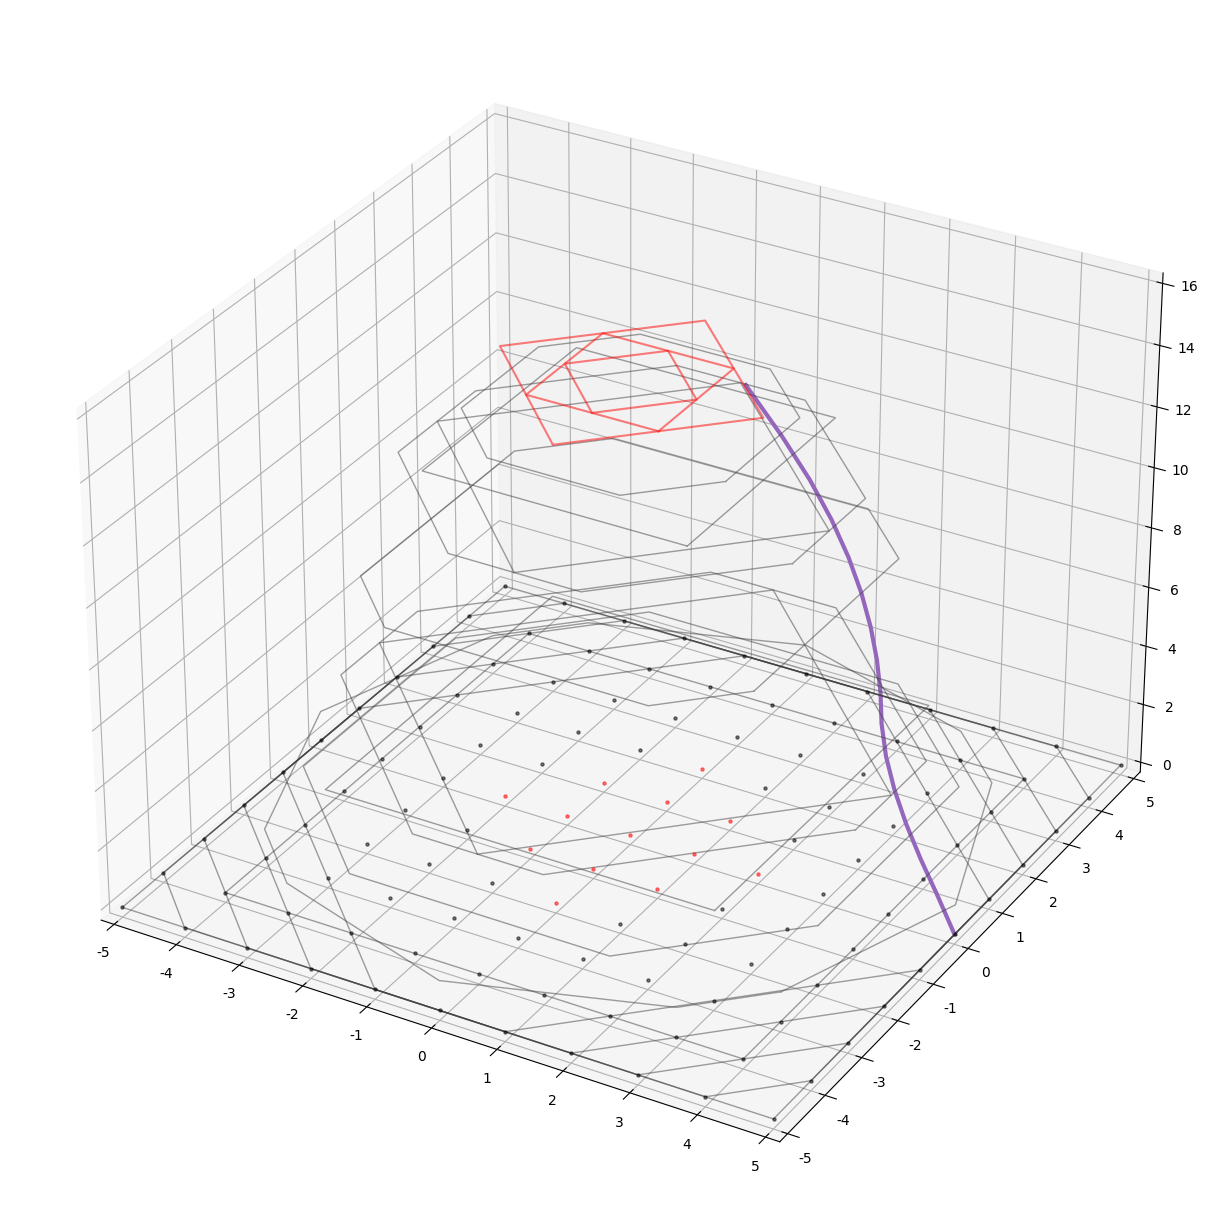

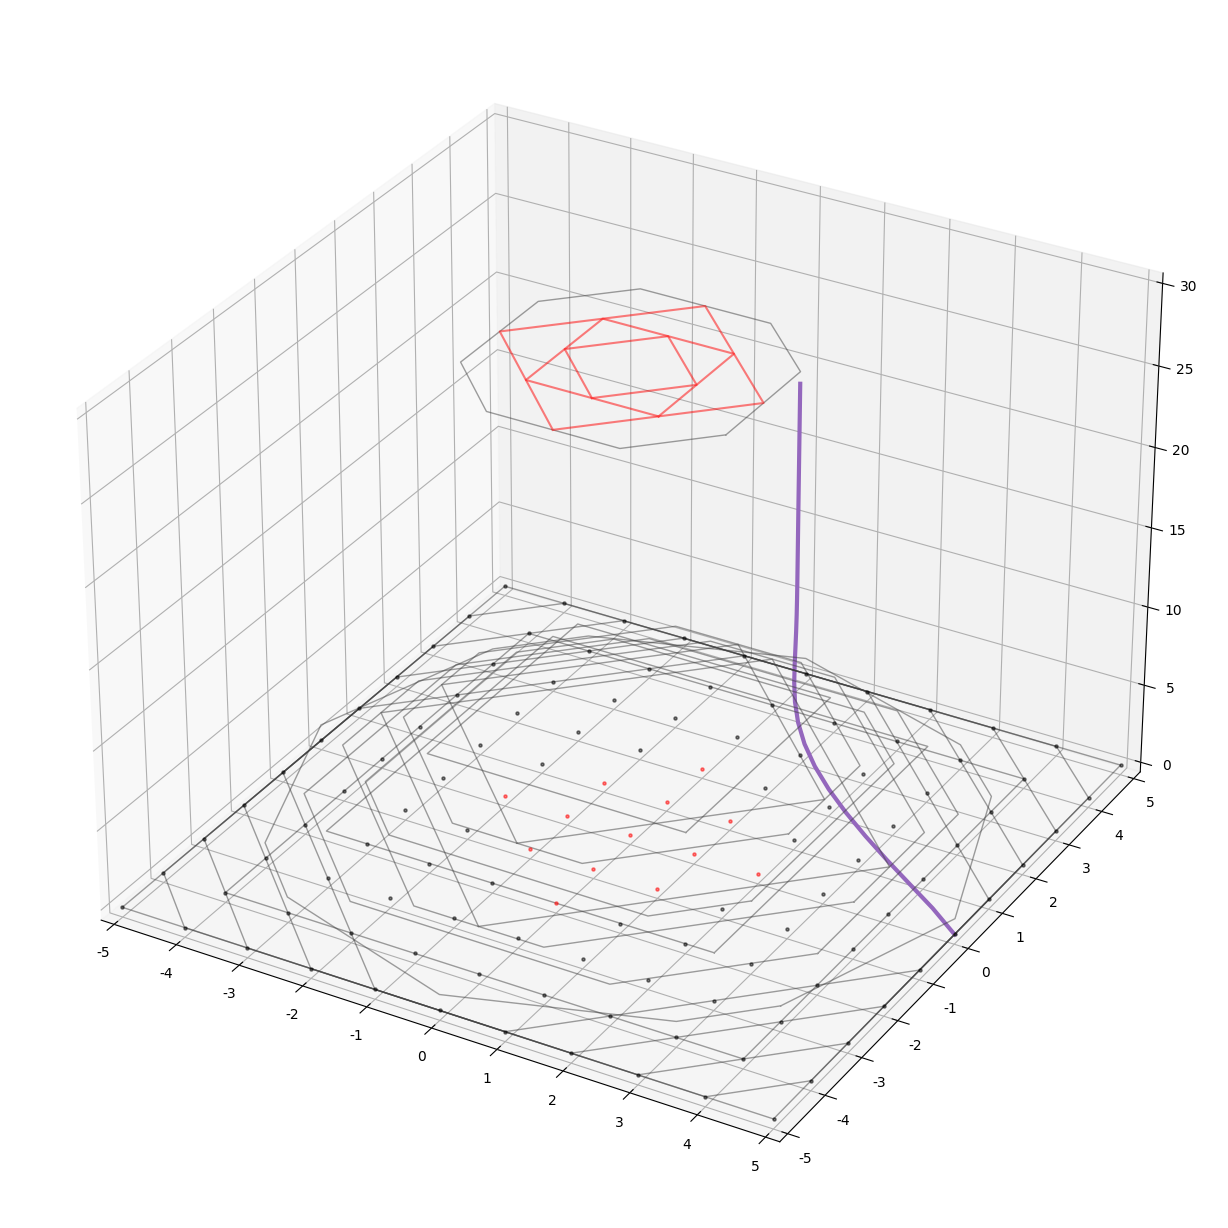

In [40]:
# fig, ax = draw_path(lattice, stone)
time_resolution = 1
stone = Stone(
    starting_coordinate=right_most_shell,
    at_rest=True,
    angular_momentum_per_unit_mass=2
)
specific_path_finder(stone, time_resolution=time_resolution)

fig, ax = draw_path_3D(lattice, stone)

stone = Stone(
    starting_coordinate=right_most_shell,
    at_rest=True,
    angular_momentum_per_unit_mass=2
)
path_finder(stone, time_resolution=time_resolution)
fig, ax = draw_path_3D(lattice, stone)